# DIOMIRA Marco Polo (MP)

##  Tests and control plots for DIOMIRA

Marco Polo travels visiting cities and bringing news of these to the Kublai Khan. In IC, each city produces some new data. For example, DIOMIRA produces TWF and RWF, which are the "goods" of the cities. Each city needs a visit of Marco Polo (e.g, a unit test and analysis for the new data produced). 

In [1]:
from __future__ import print_function
from IPython.display import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


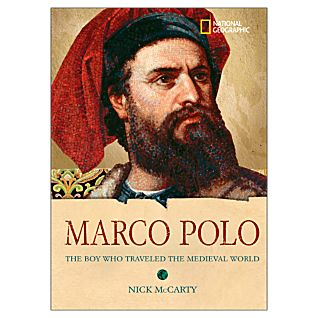

In [2]:
Image(filename='../Images/Polo.jpg') 

In [4]:
import logging
import sys
logger = logging.getLogger()
logger.handlers[0].stream = sys.stdout
logger.setLevel(logging.DEBUG)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import tables 
import numpy as np

#### Access file

In [6]:
h5f = tables.open_file('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_1k.h5', "r+") 

In [7]:
h5f

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_1k.h5, title='', mode='r+', root_uep='/', filters=Filters(complevel=9, complib='blosc', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float64Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float64Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float64Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (1170,)
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
  description := {
  "offset": Int16Col(shape=(), dflt=0, pos=0),
  "pmt_gain": Float32Col(shape=(), dflt=0.0, pos=1),
  "V_gain": Float32Col(shape=(), dflt=0.0, pos=2),
  "R": Float32Col(shape=(), dflt=0.0, pos=3),
  "C12": Float32Col(shape=(12,), dflt=0.0, pos=4),
  "CO12": Float32Col(shape=(12,), dflt=0.0, pos=5),
  "time_step": Float32Col(shape=(

#### Monte Carlo tracks

In [9]:
mctrk_t = h5f.root.MC.MCTracks

In [10]:
mctrk_t

/MC/MCTracks (Table(26606,)) ''
  description := {
  "event_indx": Int32Col(shape=(), dflt=0, pos=0),
  "mctrk_indx": Int32Col(shape=(), dflt=0, pos=1),
  "particle_name": StringCol(itemsize=10, shape=(), dflt='', pos=2),
  "pdg_code": Int32Col(shape=(), dflt=0, pos=3),
  "initial_vertex": Float64Col(shape=(3,), dflt=0.0, pos=4),
  "final_vertex": Float64Col(shape=(3,), dflt=0.0, pos=5),
  "momentum": Float64Col(shape=(3,), dflt=0.0, pos=6),
  "energy": Float64Col(shape=(), dflt=0.0, pos=7),
  "nof_hits": Int32Col(shape=(), dflt=0, pos=8),
  "hit_indx": Int32Col(shape=(), dflt=0, pos=9),
  "hit_position": Float64Col(shape=(3,), dflt=0.0, pos=10),
  "hit_time": Float64Col(shape=(), dflt=0.0, pos=11),
  "hit_energy": Float64Col(shape=(), dflt=0.0, pos=12)}
  byteorder := 'little'
  chunkshape := (1,)

### Utility functions

In [3]:
def energyTracks(mctracks):
    """
    Sum of energy of all tracks of each event
    """
    track_energy = {}
    for row in mctracks.iterrows():
        evt = row['event_indx']
        mctrk = row['mctrk_indx']
        if evt not in track_energy:
            track_energy[evt] = {}
            track_energy[evt][mctrk] = row['energy']
        else:
            if mctrk not in track_energy[evt]:
                track_energy[evt][mctrk] = row['energy']
    return map(lambda trks: sum(trks.values()),track_energy.values())

In [ ]:
def energy_tracks(mctracks):
    """
    Sum of energy of all tracks of each event
    """
    EVT=
    for row in mctracks.iterrows():
        evt = row['event_indx']
        mctrk_indx = row['mctrk_indx']
        if evt not in track_energy:
            track_energy[evt] = {}
            track_energy[evt][mctrk] = row['energy']
        else:
            if mctrk not in track_energy[evt]:
                track_energy[evt][mctrk] = row['energy']
    return map(lambda trks: sum(trks.values()),track_energy.values())